In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import community as pcom
import warnings

import matplotlib.cbook
import p20191_paa_sem1.graph as mg
import p20191_paa_sem1.graph_draw as mgd

warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

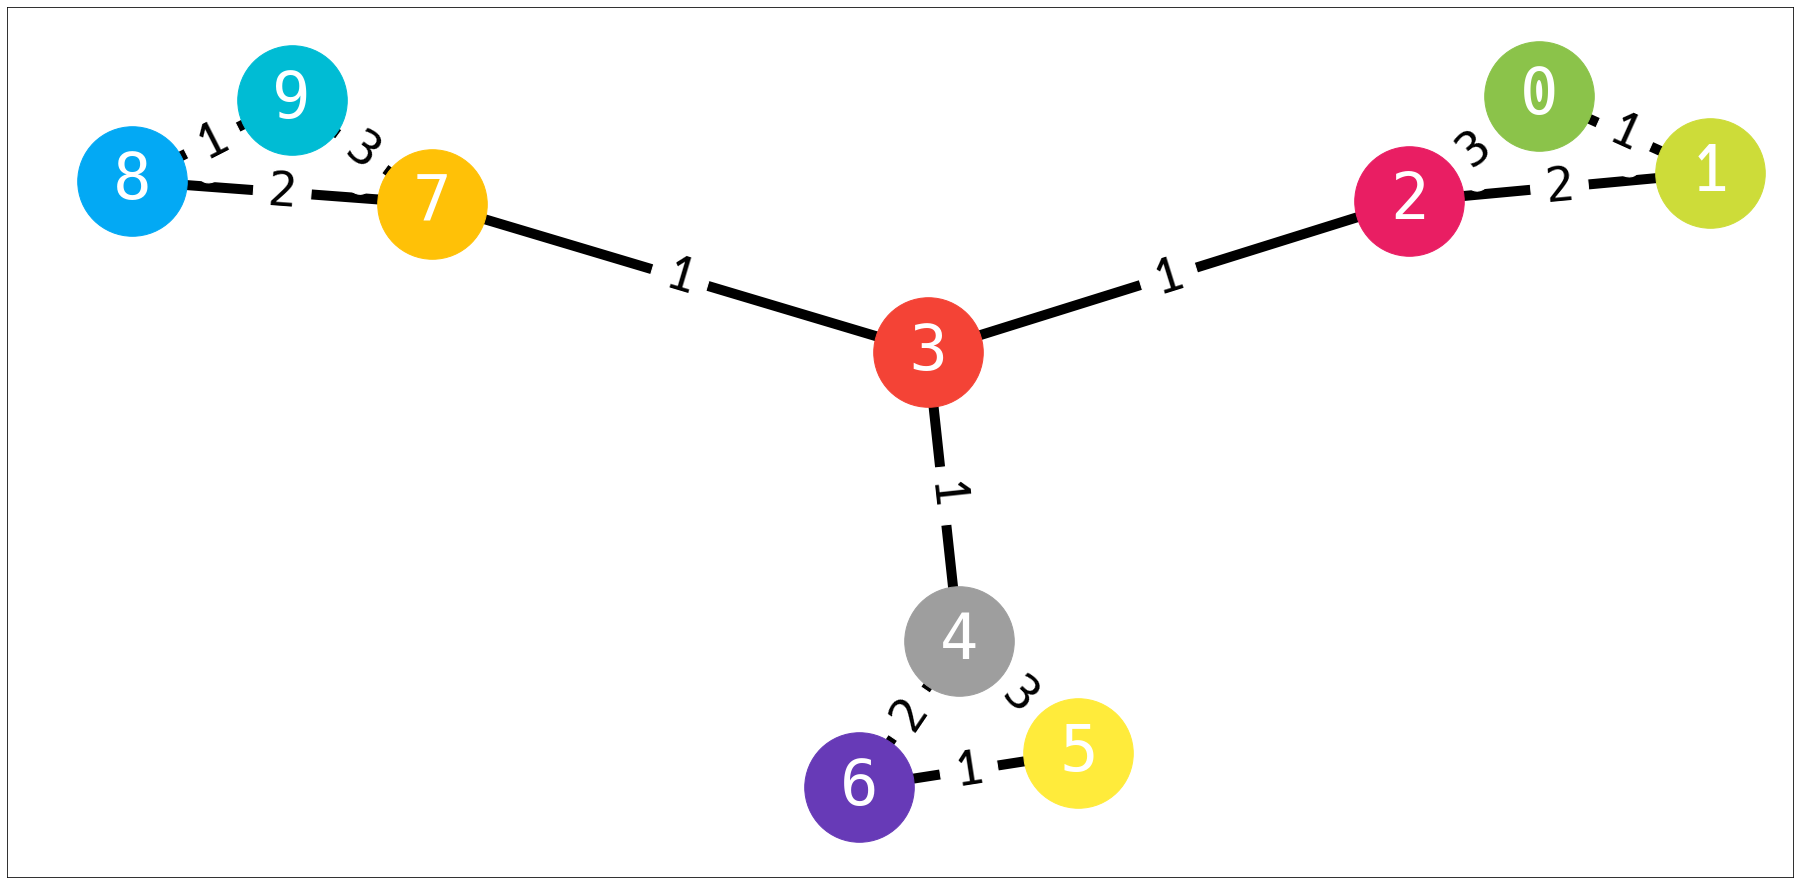

In [3]:
adjMatrix = [
    [0, 1, 3, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 2, 0, 0, 0, 0, 0, 0, 0], 
    [3, 2, 0, 1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 3, 2, 0, 0, 0], 
    [0, 0, 0, 0, 3, 5, 1, 0, 0, 0], 
    [0, 0, 0, 0, 2, 1, 0, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0, 0, 0, 2, 3], 
    [0, 0, 0, 0, 0, 0, 0, 2, 0, 1], 
    [0, 0, 0, 0, 0, 0, 0, 3, 1, 0]
]

#adjMatrix = [[1 if j != i else 0 for j in range(10)] for i in range(10)]

adjMatrix = np.array(adjMatrix)
graph = mg.adjMToGraph(adjMatrix, weighted=True)

mgd.drawGraphWithCommunities(graph, weighted=True)

currMod: 0.0547


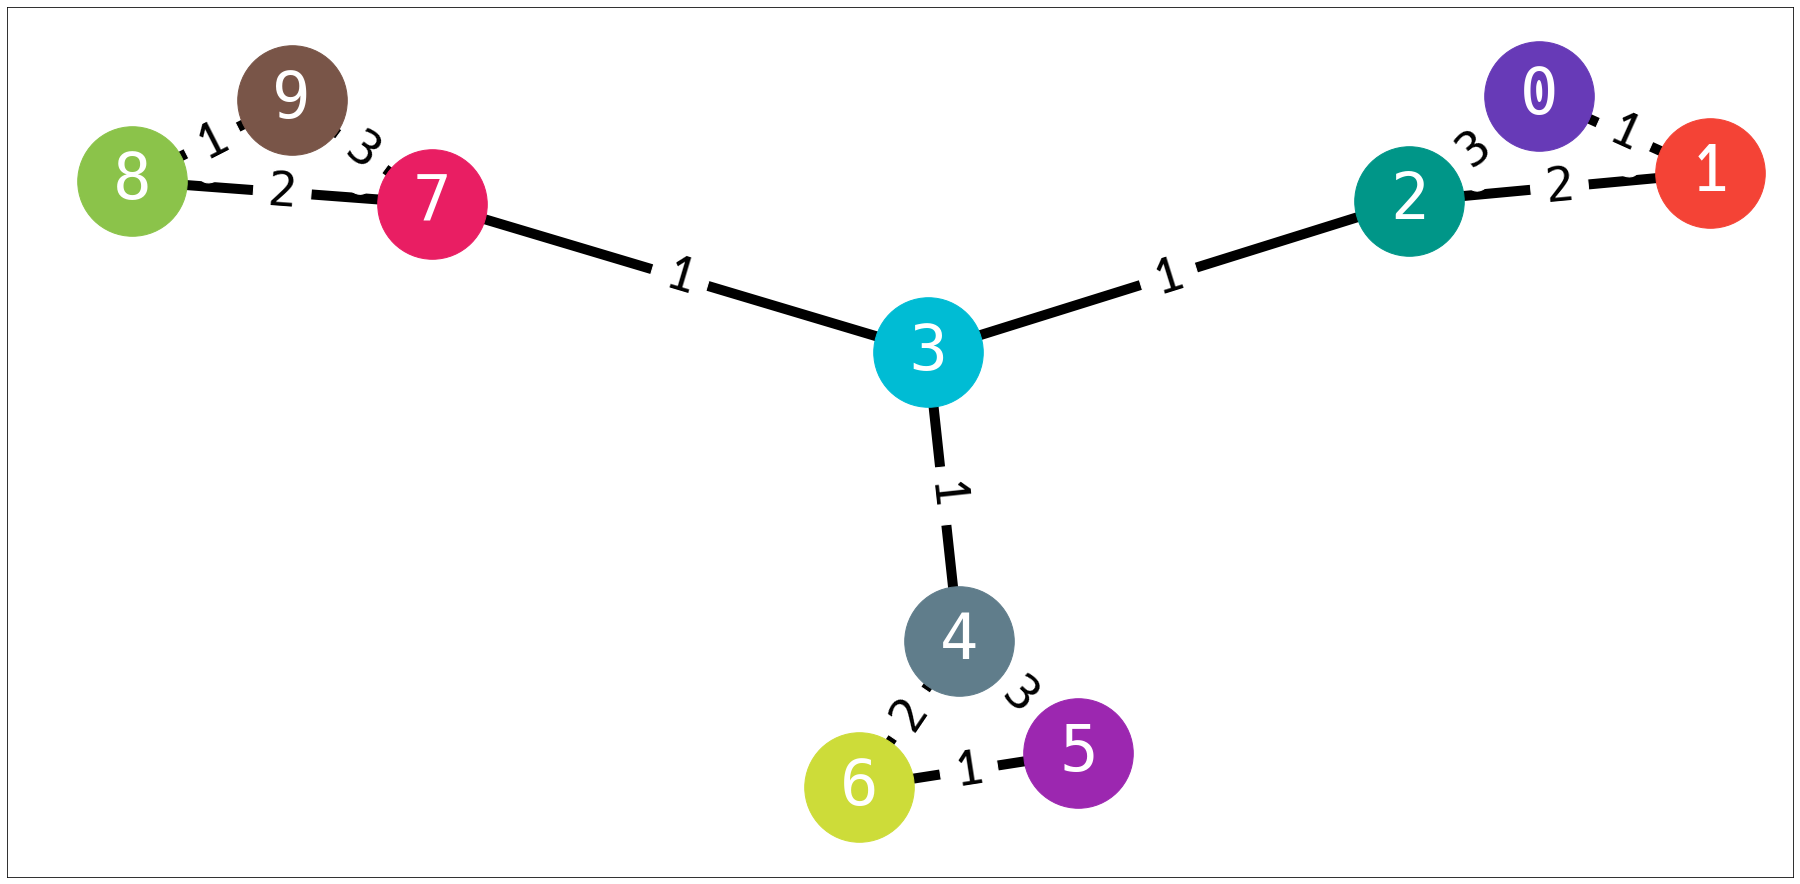

Node 0:
1: 0.0296 2: 0.0976
currMod: 0.1524


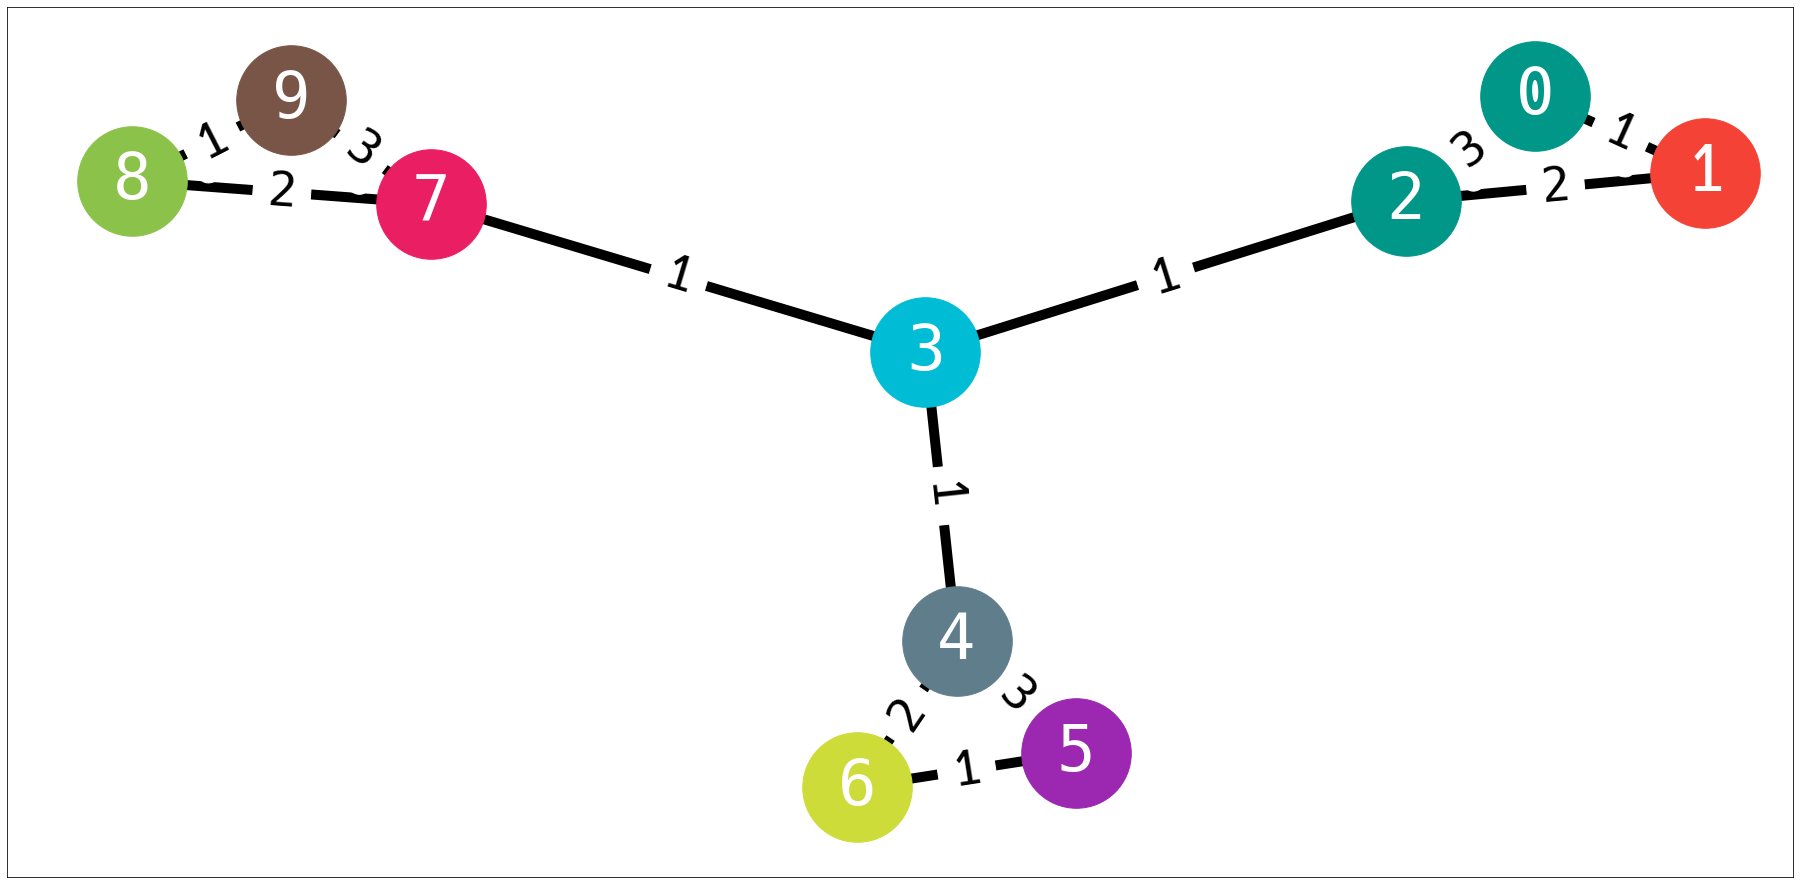

Node 1:
2: 0.0932
currMod: 0.2456


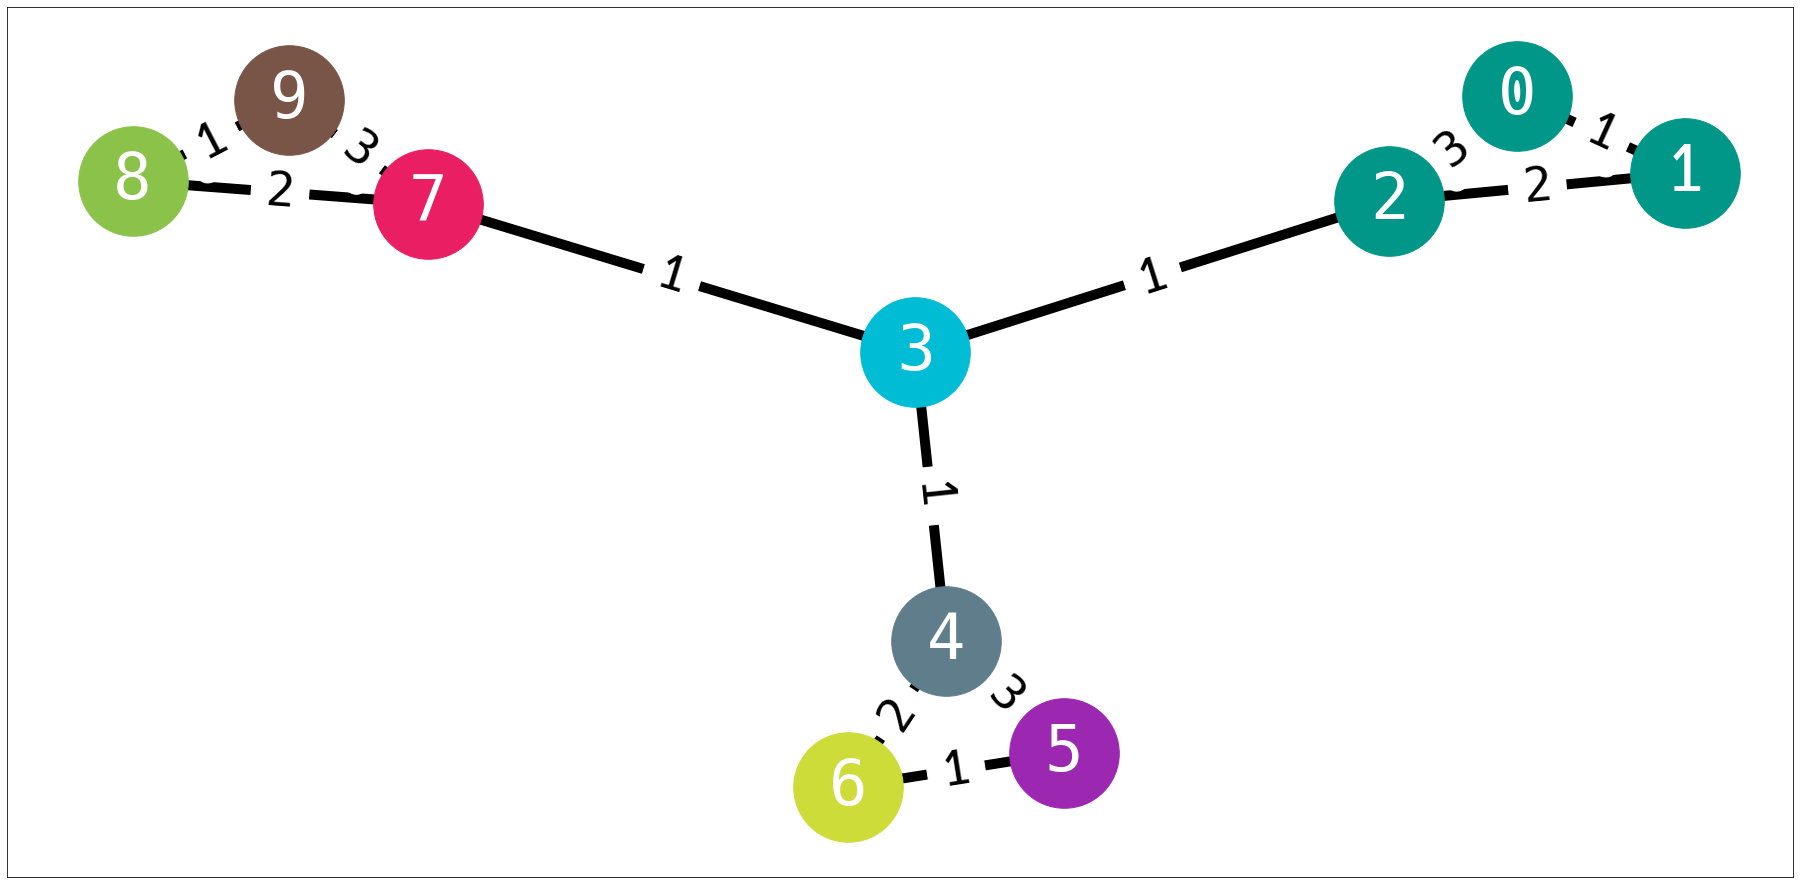

Moving node 2 gives no gain
Node 3:
2: 0.0096 4: 0.0251 7: 0.0251
currMod: 0.2707


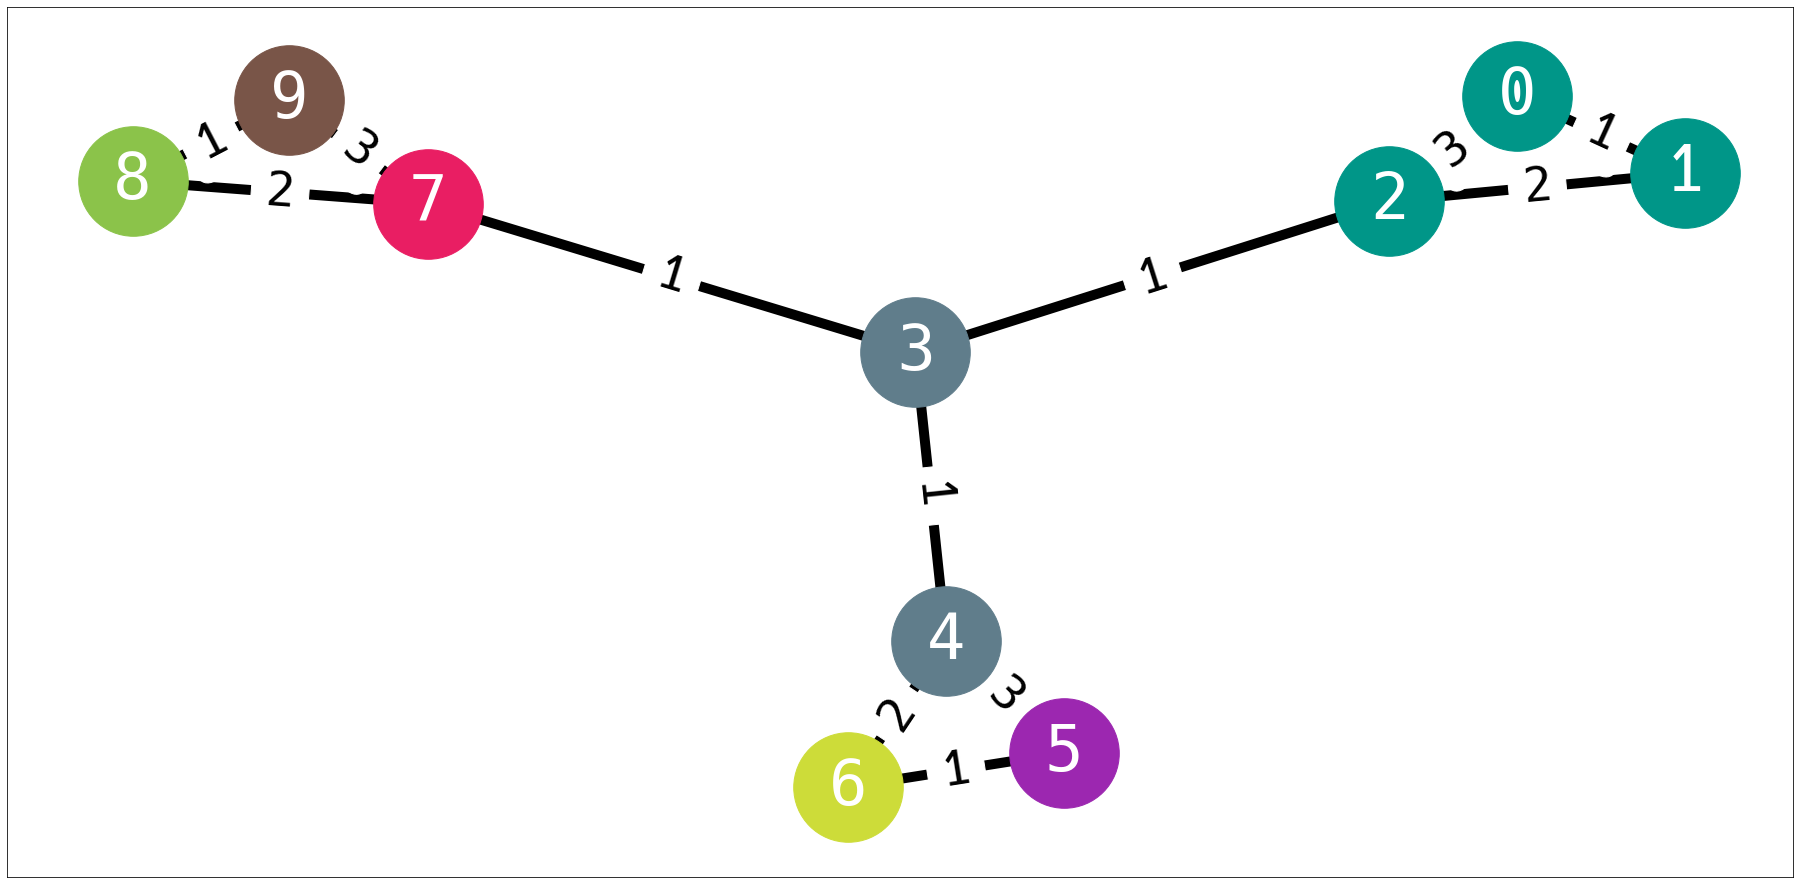

Node 4:
5: 0.0281 6: 0.0385
currMod: 0.3092


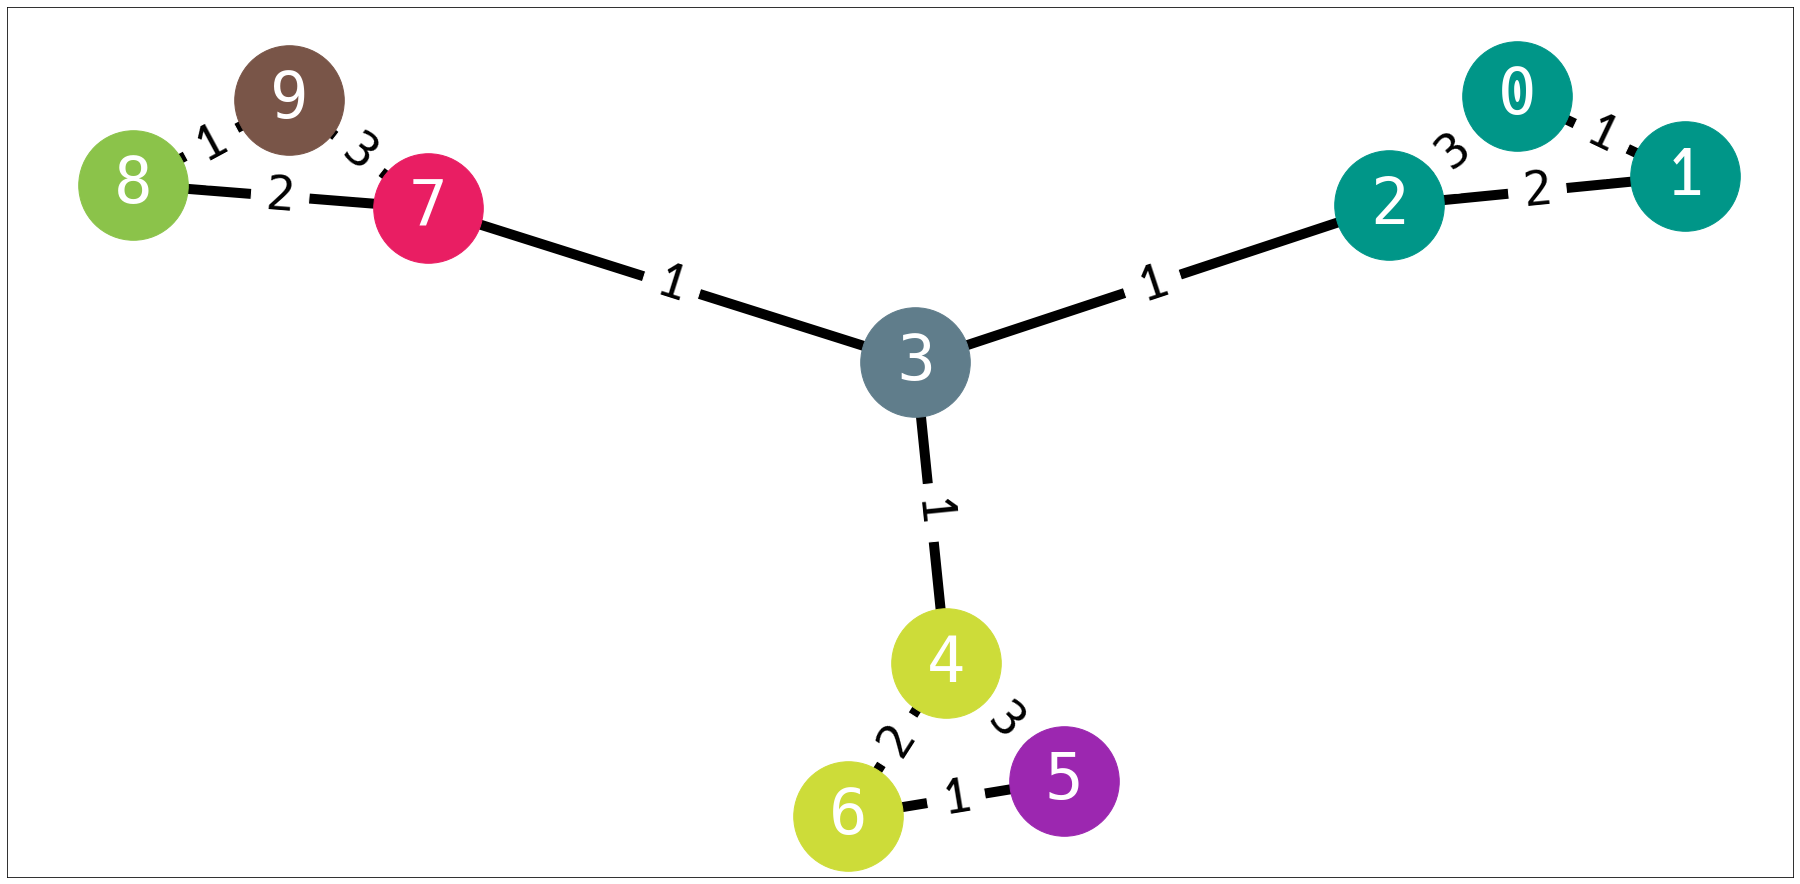

Node 5:
6: 0.0607
currMod: 0.3698


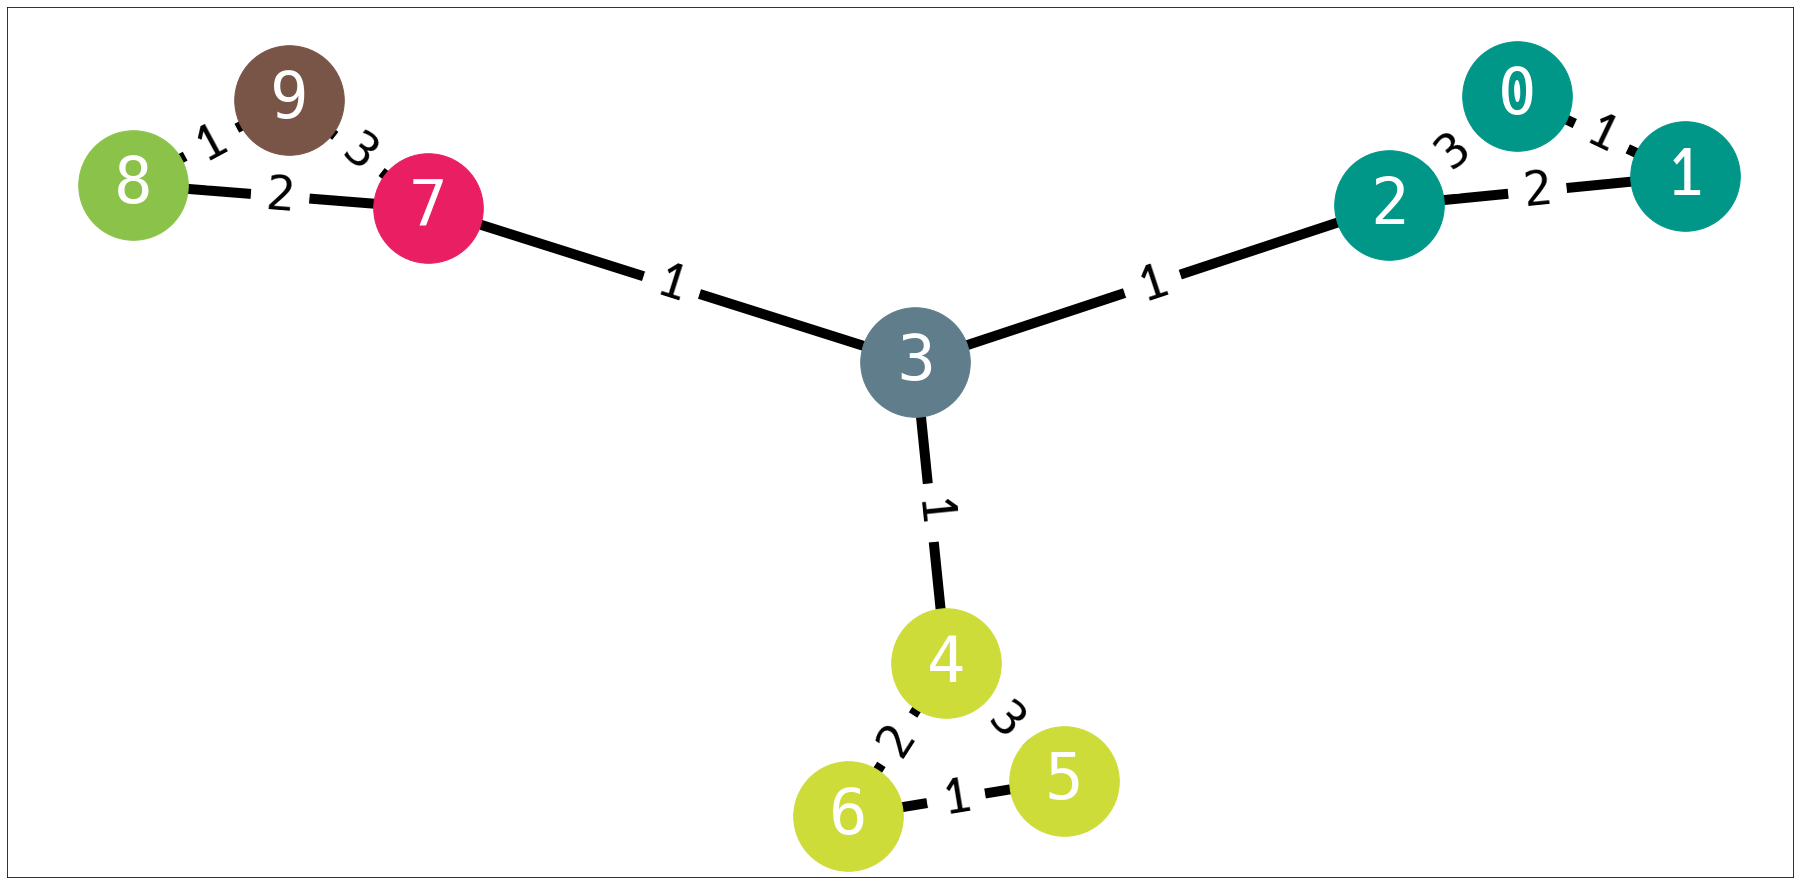

Moving node 6 gives no gain
Node 7:
4: 0.0251 8: 0.0636 9: 0.0976
currMod: 0.4675


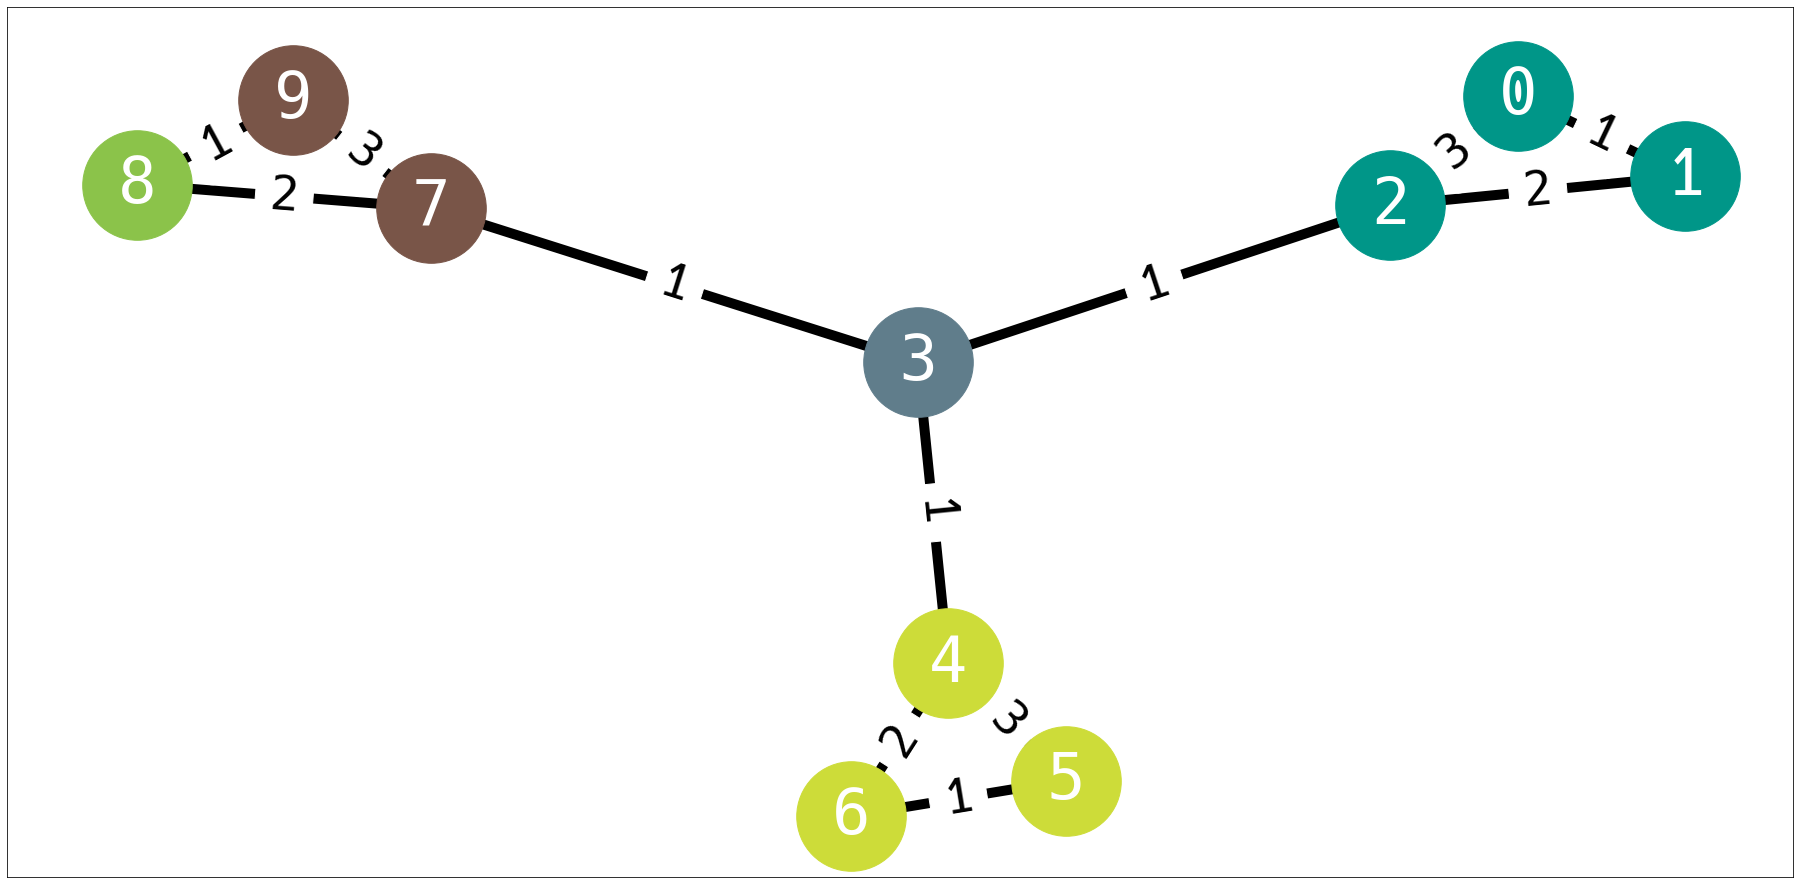

Node 8:
9: 0.0932
currMod: 0.5607


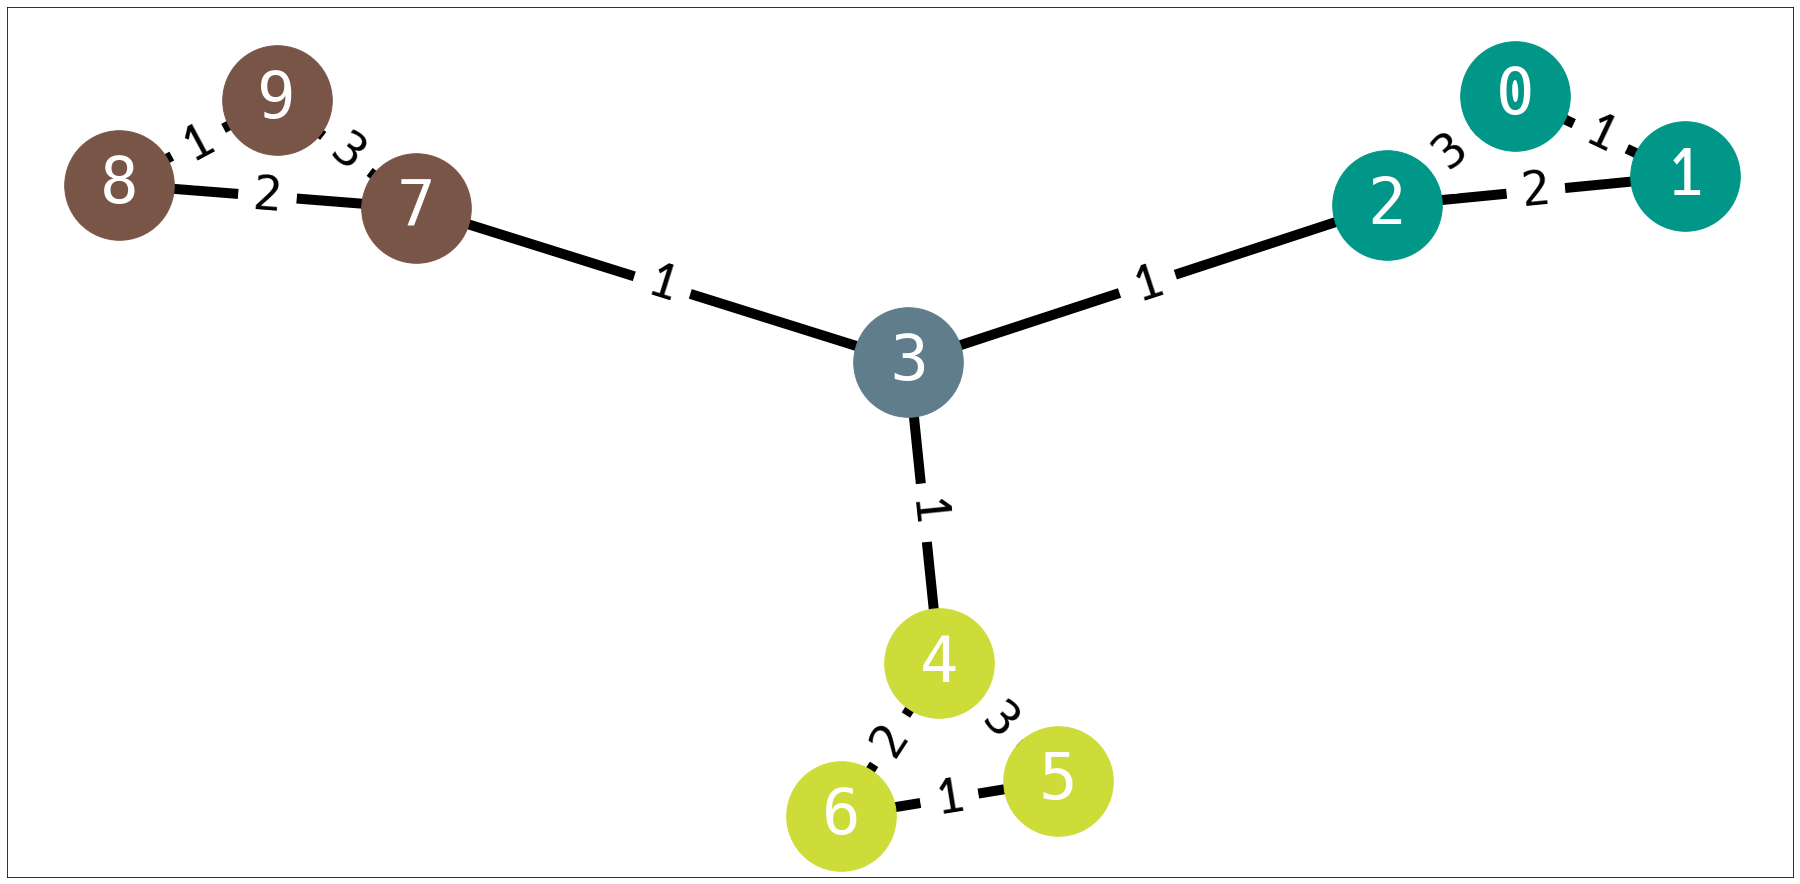

Moving node 9 gives no gain
Moving node 0 gives no gain
Moving node 1 gives no gain
Moving node 2 gives no gain
Node 3:
2: 0.0096 6: -0.0126 9: 0.0096
currMod: 0.5703


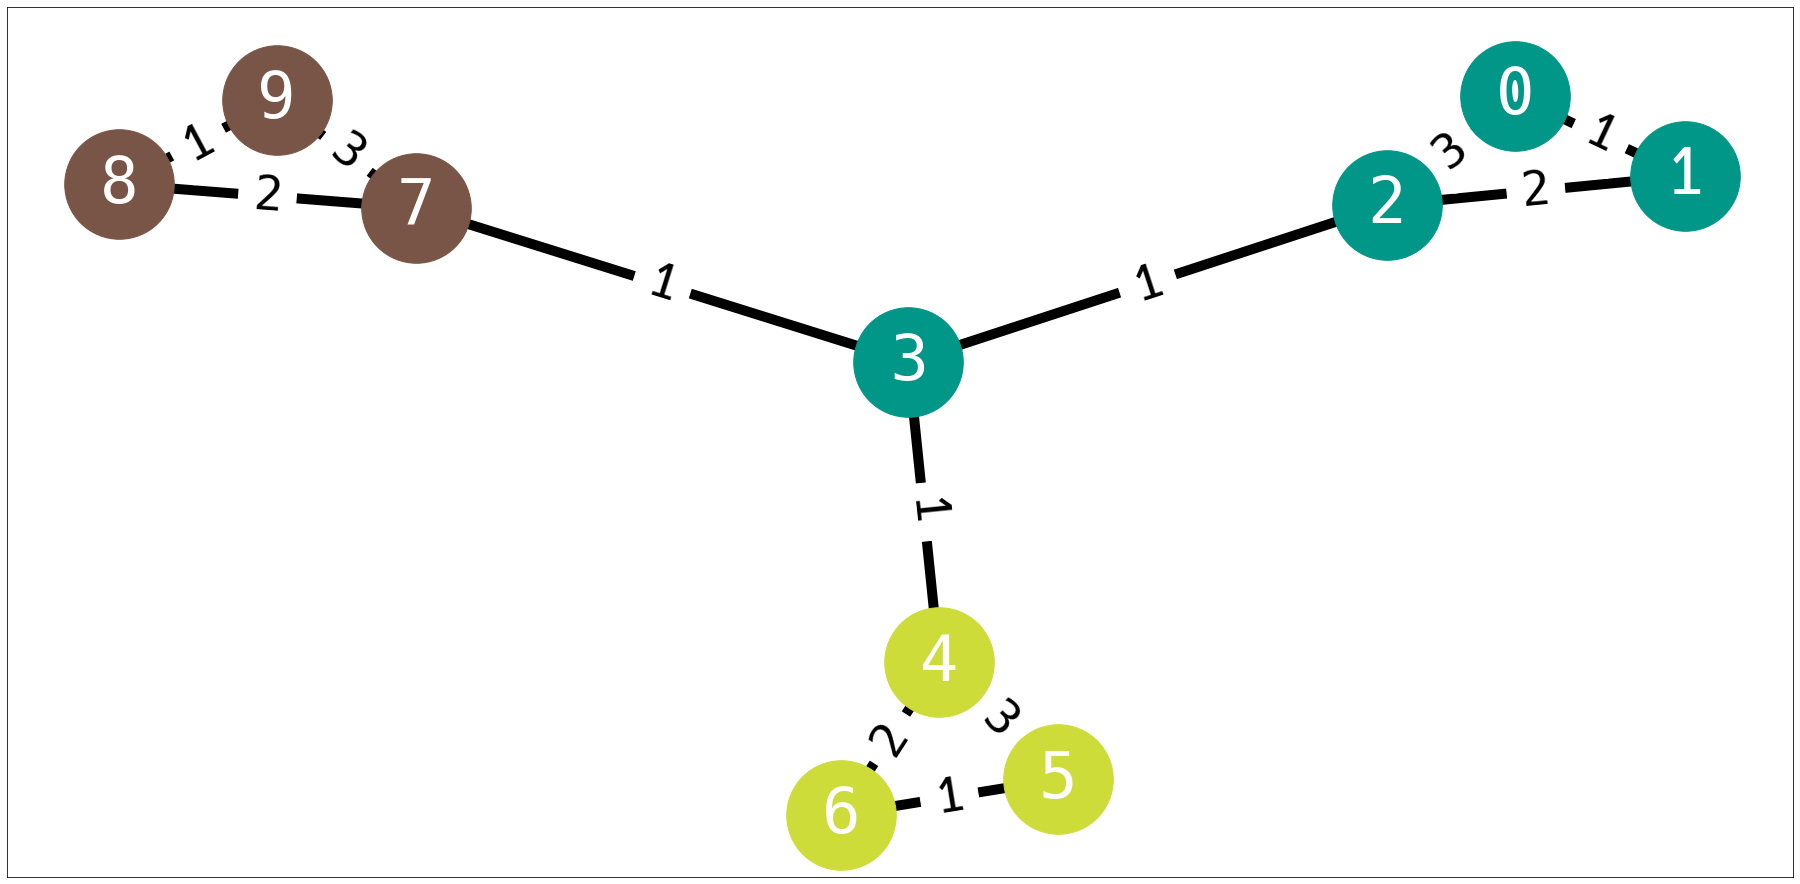

Moving node 4 gives no gain
Moving node 5 gives no gain
Moving node 6 gives no gain
Moving node 7 gives no gain
Moving node 8 gives no gain
Moving node 9 gives no gain
Moving node 0 gives no gain
Moving node 1 gives no gain
Moving node 2 gives no gain
Moving node 3 gives no gain
Moving node 4 gives no gain
Moving node 5 gives no gain
Moving node 6 gives no gain
Moving node 7 gives no gain
Moving node 8 gives no gain
Moving node 9 gives no gain


In [4]:
G = graph
partition = { node: node for node in G }

colors = [
        '#F44336',
        '#E91E63',
        '#9C27B0',
        '#673AB7',
        '#3F51B5',
        '#2196F3',
        '#03A9F4',
        '#00BCD4',
        '#009688',
        '#4CAF50',
        '#8BC34A',
        '#CDDC39',
        '#FFEB3B',
        '#FFC107',
        '#FF9800',
        '#FF5722',
        '#795548',
        '#9E9E9E',
        '#607D8B'
]

currMod = nx.algorithms.community.modularity(G, mg.nodeCommunitiesToPartition(partition))
print('currMod: %.4f' % currMod)
mgd.drawGraphWithCommunities(G, communities=mg.reverseDict(partition), weighted=True)
plt.show()

while True:
    
    found = False
    for i in sorted(G):
        ic = partition[i]
        
        deltas = {}
        for j, edge in G[i].items():
            c = partition[j]
            if c == ic:
                continue
            
            q0 = nx.algorithms.community.modularity(G, mg.nodeCommunitiesToPartition(partition))
            
            oldPart = partition[i]
            partition[i] = c
            
            q1 = nx.algorithms.community.modularity(G, mg.nodeCommunitiesToPartition(partition))
            
            partition[i] = oldPart
            
            deltas[c] = q1 - q0
        
        m = max(deltas.items(), key=lambda x: x[1]) if deltas else (0, -1)
        if m[1] > 0:
            found = True
            partition[i] = m[0]
            
            print(f'Node {i}:')
            print(' '.join(f'{k}: %.4f' % v for k, v in deltas.items()))
            
            currMod = nx.algorithms.community.modularity(G, mg.nodeCommunitiesToPartition(partition))
            print('currMod: %.4f' % currMod)
            
            mgd.drawGraphWithCommunities(G, communities=mg.reverseDict(partition), weighted=True)            
            plt.show()

        else:
            print(f'Moving node {i} gives no gain')
        
    if not found:
        break